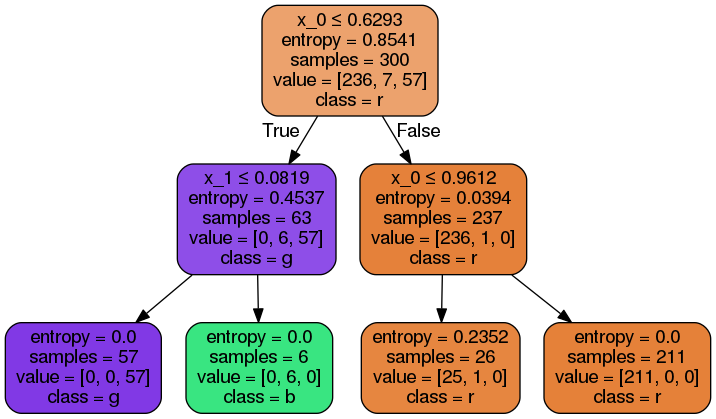

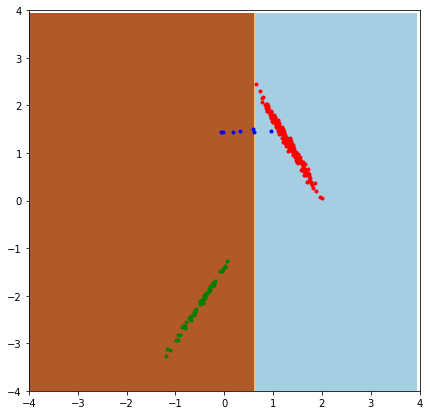

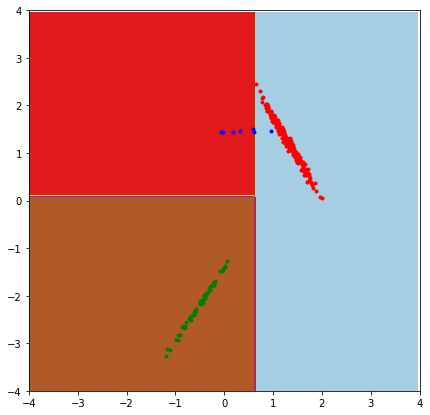

In [3]:
from sklearn.datasets import load_iris
from sklearn import tree
from IPython.display import Image  
import pydotplus
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

N = 3
Lim = 4
X = []
C = []
w = np.random.rand(N)
w = w/np.sum(w)
mu = []
Sig = []

for i in range(N):
    mu.append(np.random.randn(2))
    A = np.random.randn(2,2)/3
    Sig.append(A.dot(A.T))
    
T = N*100

Ts = np.random.multinomial(T, w)

for i in range(N):
    x = np.random.multivariate_normal(mu[i], Sig[i], Ts[i])
    c = np.ones(Ts[i])*i
    X.append(x)
    C.append(c)

XX = np.concatenate(X,axis=0)
CC = np.concatenate(C,axis=0)

#try different depth and information gain criteria
for depth in range(1,3):
    clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=depth)
    clf = clf.fit(XX, CC)

    plot_step = 0.05
    plt.figure(figsize=(7,7))

    ax = plt.gca()
    ax.set_xlim(-Lim,Lim)
    ax.set_ylim(-Lim,Lim)

    x_min, x_max = -Lim, Lim
    y_min, y_max = -Lim, Lim
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    col = ['r','b','g','k','y','m']

    for i in range(N):
        plt.plot(X[i][:,0],X[i][:,1],'.'+col[i%len(col)])
        
class_names = col[0:N]
feature_names = ['x_0','x_1']
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=feature_names, class_names=class_names, filled=True, rounded=True, special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  